In [10]:
import sys
sys.path.append("/mnt/c/Users/dambr/Desktop/AstroCosmoComputational/Students/Anna_DAmbrosio/")

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})

# Import pyACC logger
#from pyACC.helpers import Logger

# Set the logger
#print = Logger("pyACC.CosmologicalDistances")

# Import your integration methods
from pyACC.Calculus import intgr

# Import integration class
from pyACC.cosmology import *

import scipy as sp
from scipy import interpolate

# Import pandas
import pandas as pd

from random import randint

In [11]:
# array of redshifts to interpolate
n_steps = 3
n_in = 1
n_fin = 3
N_int = np.logspace(n_in,n_fin,n_steps)
z_min = 0.0001
z_max = 1.0
steps_z = 150

list_z = []

for i in range (N_int.size):
    z_list = np.linspace(z_min, z_max, int(N_int[i]))
    list_z.append(z_list)

# array of redshift for theoretical comparison
z_th = np.linspace(z_min, z_max, steps_z)

In [12]:
# Calculate the comoving distance at each redshift in z_th
comoving_distance_th = comoving_distance(z_th)

# Calculate the comoving distance at each redshift in z_list for interpolation
list_dc = []
for i in range(N_int.size):
    comoving_distance_i = comoving_distance(list_z[i])
    list_dc.append(comoving_distance_i)

In [13]:
# linear interpolatioin of comoving distance
list_int = []
for i in range(N_int.size):
    comoving_distance_int = sp.interpolate.interp1d(list_z[i], list_dc[i])
    list_int.append(comoving_distance_int)

In [14]:
# calculation of function in z_th
list_fun = []
for i in range(N_int.size):
    comoving_distance_int = list_int[i](z_th)
    list_fun.append(comoving_distance_int)

In [15]:
# calculation of difference of the two methods
list_delta = []
for i in range(N_int.size):
    delta_DC = comoving_distance_th - list_fun[i]
    list_delta.append(delta_DC)

In [16]:
# calculation of theoretical error
c_d_fun = lambda x: comoving_distance(x)
list_error_th = []
for i in range(N_int.size):
    h = z_max/int(N_int[i])
    der_2 = np.zeros(z_th.size)
    for zeta,zet in enumerate(z_th):
        der_2[zeta] = sp.misc.derivative(c_d_fun,zet.item(),dx=1e-6,n=2)
    error = ((h**2)/8)*np.absolute(der_2)
    list_error_th.append(error)

/tmp/ipykernel_13930/3360019503.py:8: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  der_2[zeta] = sp.misc.derivative(c_d_fun,zet.item(),dx=1e-6,n=2)


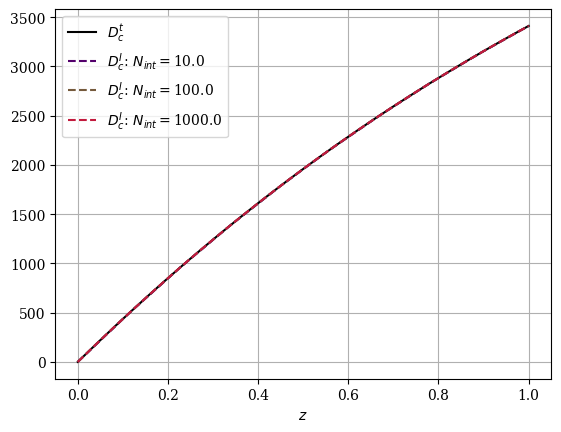

In [17]:
# plot:
colors = []
for i in range(n_steps):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

plt.plot(z_th, comoving_distance_th, label=r'$D_c^t$', color='black')
for i in range(N_int.size):
    plt.plot(z_th, list_fun[i], label=r'$D_c^I$:' + r'$ \ N_{int}=$' + str(N_int[i]), linestyle='dashed', color=colors[i])


plt.grid(True)
plt.xlabel(r'$z$');
plt.legend()

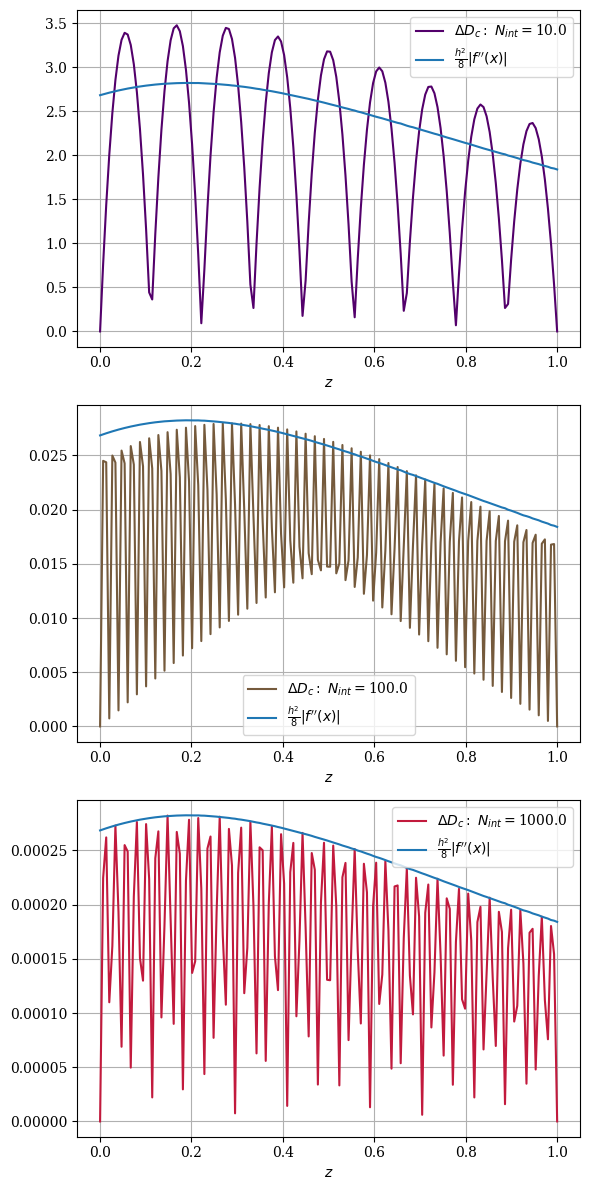

In [18]:
fig, ax = plt.subplots(N_int.size, 1, figsize=(6, 4*N_int.size))

for i in range(N_int.size):
    ax[i].plot(z_th, list_delta[i], label=r'$\Delta D_c :$' + r'$ \ N_{int}=$' + str(N_int[i]), color=colors[i])
    ax[i].plot(z_th, list_error_th[i], label=r'$\frac{h^2}{8}|f^{\prime \prime}(x)|$')

#aggiungere plot errore teorico in ogni asse

for _ax in ax.flatten():
    _ax.grid(True)
    _ax.set_xlabel(r'$z$')
    _ax.legend()
fig.tight_layout()